# Convolutional Neural Network
## 1. Object Classification using MNISTData

In [1]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

import os

### 1.1 Load Data
-Adjust `download` argument to `True` if data is not downloaded

In [2]:

classes = list(str(i) for i in range(10))

# your code here
transform = transforms.Compose(
    [transforms.RandomAffine(degrees=60, translate=(0.2, 0.2), scale=(0.5, 2.), 
                                               shear=None, resample=0, fillcolor=0),
     transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data/data_mnist', download=False, train=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data/data_mnist', download=False, train=False,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



/opt/anaconda3/lib/python3.8/site-packages/torchvision/transforms/transforms.py:1343: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/torchvision/transforms/transforms.py:1357: UserWarning: Argument fillcolor is deprecated and will be removed since v0.10.0. Please, use fill instead
  warnings.warn(



Extracting ./data/data_mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/data_mnist/MNIST/raw




Extracting ./data/data_mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/data_mnist/MNIST/raw




Extracting ./data/data_mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/data_mnist/MNIST/raw




Extracting ./data/data_mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/data_mnist/MNIST/raw



/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### 1.2 View images

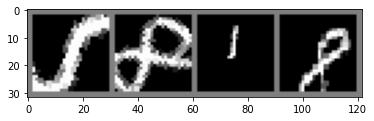

    5     8     1     8


In [3]:

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

### 1.3 Define NN Model

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        
        self.conv1 = nn.Conv2d(1, 3, kernel_size=(3,3), padding=(1,1))
        self.conv2 = nn.Conv2d(3,6, kernel_size=(3,3), padding=(1,1))
        self.bnorm2 = nn.BatchNorm2d(6)
        self.conv3 = nn.Conv2d(6,12, kernel_size=(3,3), padding=(1,1))
        self.conv4 = nn.Conv2d(12,18, kernel_size=(3,3), padding=(1,1))
        
        self.bnorm4 = nn.BatchNorm2d(18)


        self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(in_features=7*7*18, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)
        
        self.Dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = F.relu(self.conv1(x)) #32*32*3
        x = F.relu(self.bnorm2(self.conv2(x))) #32*32*6
        x = self.pool(x) #16*16*6

        
        x = F.relu(self.conv3(x)) #16*16*12
        x = F.relu(self.bnorm4(self.conv4(x))) #16*16*18
        x = self.pool(x) # 8*8*18

        x = x.view(-1, 7*7*18) # reshape x

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.Dropout(x)
        x = self.fc3(x)
        
        output = F.log_softmax(x,dim=1)
        return  output


net = Net()

### 1.4 Defining The Loss Function and The Optimizer

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 1.5 Training the Model

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #change environment - pytorch doesnt work with new macOS
num_epochs = 5 #set the epochs 
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 1.906
[1,  4000] loss: 1.387
[1,  6000] loss: 1.123
[1,  8000] loss: 0.994
[1, 10000] loss: 0.880
[1, 12000] loss: 0.824
[1, 14000] loss: 0.759
[2,  2000] loss: 0.714
[2,  4000] loss: 0.710
[2,  6000] loss: 0.641
[2,  8000] loss: 0.636
[2, 10000] loss: 0.626
[2, 12000] loss: 0.630
[2, 14000] loss: 0.580
[3,  2000] loss: 0.574
[3,  4000] loss: 0.577
[3,  6000] loss: 0.572
[3,  8000] loss: 0.520
[3, 10000] loss: 0.546
[3, 12000] loss: 0.543
[3, 14000] loss: 0.536
[4,  2000] loss: 0.511
[4,  4000] loss: 0.499
[4,  6000] loss: 0.482
[4,  8000] loss: 0.469
[4, 10000] loss: 0.496
[4, 12000] loss: 0.481
[4, 14000] loss: 0.485
[5,  2000] loss: 0.460
[5,  4000] loss: 0.450
[5,  6000] loss: 0.454
[5,  8000] loss: 0.452
[5, 10000] loss: 0.444
[5, 12000] loss: 0.443
[5, 14000] loss: 0.449
Finished Training


### 1.6 Storing the Model

In [7]:
save_model = True
if save_model:
    PATH = './models/mnist_net.pth'
    torch.save(net.state_dict(), PATH)


### 1.7 Evaluating the Trained Model

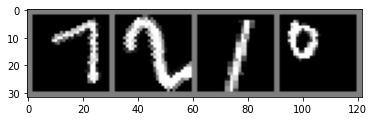

GroundTruth:      7     2     1     0


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Predicted:      7     2     1     0
Accuracy of the network on the 10000 test images: 88 %


In [10]:
print('Per Class Accuracy')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Per Class Accuracy
Accuracy for class 0     is: 96.7 %
Accuracy for class 1     is: 97.1 %
Accuracy for class 2     is: 84.2 %
Accuracy for class 3     is: 86.9 %
Accuracy for class 4     is: 89.1 %
Accuracy for class 5     is: 85.0 %
Accuracy for class 6     is: 92.3 %
Accuracy for class 7     is: 85.3 %
Accuracy for class 8     is: 81.0 %
Accuracy for class 9     is: 86.6 %


### 1.8 Evaluate how large the NN model is
Trying to keep the model file size < 1MB

In [11]:
size = os.path.getsize(PATH)/1000000

print('Size = %.2f MB' %size)

Size = 0.51 MB
